## PANDAS

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# import seaborn as sns 

In [6]:
# Read the data from the csv file 
parks = pd.read_csv('parks.csv') 
species = pd.read_csv('species.csv', low_memory=False) 

In [15]:
# parks.head is for first n elements 
# parks.tail is for last n elements 

parks.iloc[30:35]

,Park Code,Park Name,State,Acres,Latitude,Longitude
30,ISRO,Isle Royale National Park,MI,571790,48.10,-88.55
31,JOTR,Joshua Tree National Park,CA,789745,33.79,-115.90
32,KATM,Katmai National Park and Preserve,AK,3674530,58.50,-155.00
33,KEFJ,Kenai Fjords National Park,AK,669983,59.92,-149.65
34,KOVA,Kobuk Valley National Park,AK,1750717,67.55,-159.28


In [29]:
parks.columns = ['Park Code', 'Park Name', 'State', 'Acres', 'Latitude', 'Longitude'] 

In [31]:
parks.columns

Index(['Park Code', 'Park Name', 'State', 'Acres', 'Latitude', 'Longitude'], dtype='object')

In [32]:
parks.head(2)

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57


In [35]:
species.head(2)

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN


In [57]:
merged_data = pd.merge(parks, species, how='inner', on='Park Name') 

In [58]:
merged_data.head(2)

,Park Code,Park Name,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1000,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1001,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN


In [ ]:
# INNER JOIN - There is a common column in both the tables 
# LEFT JOIN - All the rows from the left table and the common rows from the right table 
# RIGHT JOIN - All the rows from the right table and the common rows from the left table 
# OUTER JOIN - All the rows from both the tables 

In [60]:
merged_data.shape   


(119248, 19)

In [ ]:
merged_data

In [68]:
parks['State'].unique()

array(['ME', 'UT', 'SD', 'TX', 'FL', 'CO', 'NM', 'CA', 'SC', 'OR', 'OH',
       'AK', 'CA, NV', 'MT', 'NV', 'AZ', 'TN, NC', 'WY', 'HI', 'AR', 'MI',
       'KY', 'WA', 'VA', 'ND', 'MN', 'WY, MT, ID'], dtype=object)

<Axes: ylabel='count'>

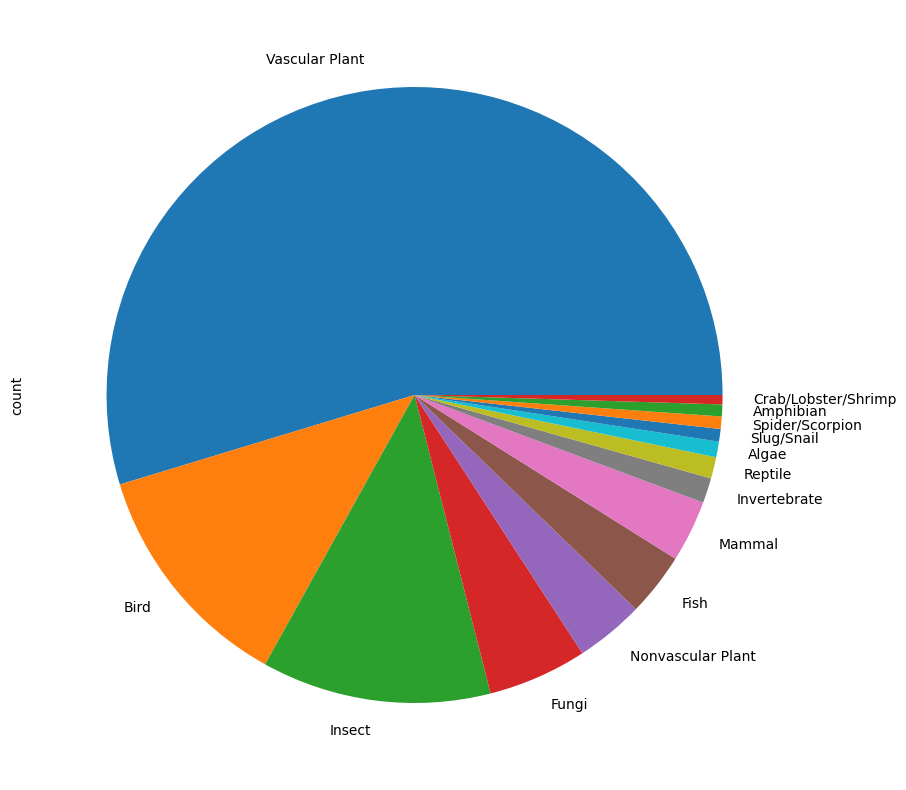

In [72]:
species['Category'].value_counts().plot(kind='pie', figsize=(10, 10))

In [74]:
species['Category'].where(species['Category'] == 'Mammal')

0         Mammal
1         Mammal
2         Mammal
3         Mammal
4         Mammal
           ...  
119243       NaN
119244       NaN
119245       NaN
119246       NaN
119247       NaN
Name: Category, Length: 119248, dtype: object

In [83]:
merged_data.dropna(subset=['Seasonality'], inplace=True)

<Axes: >

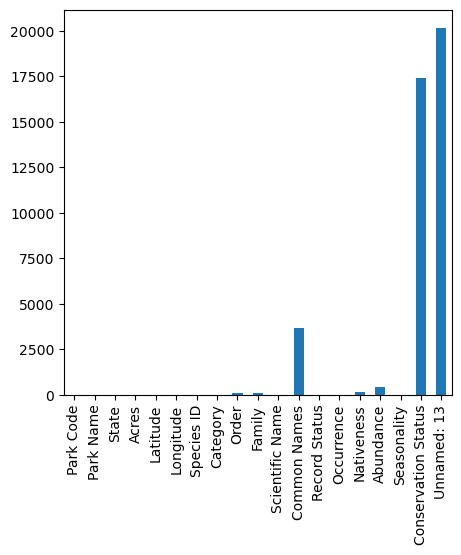

In [88]:
merged_data.isna().sum().plot(kind='bar', figsize=(5, 5))

In [107]:
merged_data[(merged_data['Conservation Status'] == 'Endangered') & (merged_data['Category'] == 'Mammal')]


,Park Code,Park Name,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
2774,BADL,Badlands National Park,SD,242756,43.75,-102.50,BADL-1017,Mammal,Carnivora,Mustelidae,Mustela nigripes,"Ferret, Black-Footed",Approved,Present,Native,Uncommon,Breeder,Endangered,NaN
4156,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,BIBE-1010,Mammal,Carnivora,Canidae,Canis lupus,Gray Wolf,Approved,Present,Native,Unknown,Resident,Endangered,NaN
4178,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,BIBE-1032,Mammal,Chiroptera,Phyllostomidae,Leptonycteris nivalis,Mexican Long-Nosed Bat,Approved,Present,Native,Unknown,Resident,Endangered,NaN
14869,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1011,Mammal,Cetacea,Balaenopteridae,Balaenoptera borealis,Rorqual (Sei Whale),Approved,Present,Native,Rare,Migratory,Endangered,NaN
14870,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1012,Mammal,Cetacea,Balaenopteridae,Balaenoptera musculus,Blue Whale,Approved,Present,Native,Uncommon,Migratory,Endangered,NaN
14871,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1013,Mammal,Cetacea,Balaenopteridae,Balaenoptera physalus,Finback Whale,Approved,Present,Native,Unknown,Migratory,Endangered,NaN
14872,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1014,Mammal,Cetacea,Balaenopteridae,Megaptera novaeangliae,Humback Whale,Approved,Present,Native,Rare,Migratory,Endangered,NaN
14886,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1028,Mammal,Cetacea,Physeteridae,Physeter catodon,Sperm Whale,Approved,Present,Native,Unknown,Migratory,Endangered,NaN
30529,DRTO,Dry Tortugas National Park,FL,64701,24.63,-82.87,DRTO-1005,Mammal,Sirenia,Trichechidae,Trichechus manatus,"Caribbean Manatee, Manatee, West Indian Manatee",Approved,Present,Unknown,Rare,Vagrant,Endangered,NaN
31380,EVER,Everglades National Park,FL,1508538,25.32,-80.93,EVER-1008,Mammal,Carnivora,Felidae,Puma concolor coryi,Florida Panther,Approved,Present,Native,Unknown,Breeder,Endangered,NaN


In [98]:
endangered_species[merged_data['Category'] == 'Mammal'] 

/var/folders/s0/jjff9bbj4ml_3w2b0pqk1xqw0000gn/T/ipykernel_43127/2431203850.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  endangered_species[merged_data['Category'] == 'Mammal']


,Park Code,Park Name,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
2774,BADL,Badlands National Park,SD,242756,43.75,-102.50,BADL-1017,Mammal,Carnivora,Mustelidae,Mustela nigripes,"Ferret, Black-Footed",Approved,Present,Native,Uncommon,Breeder,Endangered,NaN
4156,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,BIBE-1010,Mammal,Carnivora,Canidae,Canis lupus,Gray Wolf,Approved,Present,Native,Unknown,Resident,Endangered,NaN
4178,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,BIBE-1032,Mammal,Chiroptera,Phyllostomidae,Leptonycteris nivalis,Mexican Long-Nosed Bat,Approved,Present,Native,Unknown,Resident,Endangered,NaN
14869,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1011,Mammal,Cetacea,Balaenopteridae,Balaenoptera borealis,Rorqual (Sei Whale),Approved,Present,Native,Rare,Migratory,Endangered,NaN
14870,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1012,Mammal,Cetacea,Balaenopteridae,Balaenoptera musculus,Blue Whale,Approved,Present,Native,Uncommon,Migratory,Endangered,NaN
14871,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1013,Mammal,Cetacea,Balaenopteridae,Balaenoptera physalus,Finback Whale,Approved,Present,Native,Unknown,Migratory,Endangered,NaN
14872,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1014,Mammal,Cetacea,Balaenopteridae,Megaptera novaeangliae,Humback Whale,Approved,Present,Native,Rare,Migratory,Endangered,NaN
14886,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,CHIS-1028,Mammal,Cetacea,Physeteridae,Physeter catodon,Sperm Whale,Approved,Present,Native,Unknown,Migratory,Endangered,NaN
30529,DRTO,Dry Tortugas National Park,FL,64701,24.63,-82.87,DRTO-1005,Mammal,Sirenia,Trichechidae,Trichechus manatus,"Caribbean Manatee, Manatee, West Indian Manatee",Approved,Present,Unknown,Rare,Vagrant,Endangered,NaN
31380,EVER,Everglades National Park,FL,1508538,25.32,-80.93,EVER-1008,Mammal,Carnivora,Felidae,Puma concolor coryi,Florida Panther,Approved,Present,Native,Unknown,Breeder,Endangered,NaN


In [94]:
endangered_species

,Park Code,Park Name,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
166,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1166,Bird,Charadriiformes,Scolopacidae,Numenius borealis,Eskimo Curlew,Approved,Not Confirmed,Native,NaN,Migratory,Endangered,NaN
477,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1477,Fish,Salmoniformes,Salmonidae,Salmo salar,"Atlantic Salmon, Landlocked Salmon",Approved,Present,Not Native,Uncommon,Breeder,Endangered,NaN
1779,ARCH,Arches National Park,UT,76519,38.68,-109.57,ARCH-1070,Bird,Accipitriformes,Cathartidae,Gymnogyps californianus,California Condor,Approved,Present,Native,Occasional,Vagrant,Endangered,NaN
2774,BADL,Badlands National Park,SD,242756,43.75,-102.50,BADL-1017,Mammal,Carnivora,Mustelidae,Mustela nigripes,"Ferret, Black-Footed",Approved,Present,Native,Uncommon,Breeder,Endangered,NaN
4156,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,BIBE-1010,Mammal,Carnivora,Canidae,Canis lupus,Gray Wolf,Approved,Present,Native,Unknown,Resident,Endangered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111606,YELL,Yellowstone National Park,"WY, MT, ID",2219791,44.60,-110.50,YELL-1208,Bird,Gruiformes,Gruidae,Grus americana,Whooping Crane,Approved,Present,Not Native,Occasional,Vagrant,Endangered,NaN
115364,YOSE,Yosemite National Park,CA,761266,37.83,-119.50,YOSE-1000,Mammal,Artiodactyla,Bovidae,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Approved,Present,Native,Rare,Breeder,Endangered,NaN
115751,YOSE,Yosemite National Park,CA,761266,37.83,-119.50,YOSE-1387,Amphibian,Anura,Ranidae,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Approved,Present,Native,Uncommon,Breeder,Endangered,NaN
117548,ZION,Zion National Park,UT,146598,37.30,-113.05,ZION-1096,Bird,Accipitriformes,Cathartidae,Gymnogyps californianus,California Condor,Approved,Present,Native,Unknown,Vagrant,Endangered,NaN


<Axes: xlabel='State'>

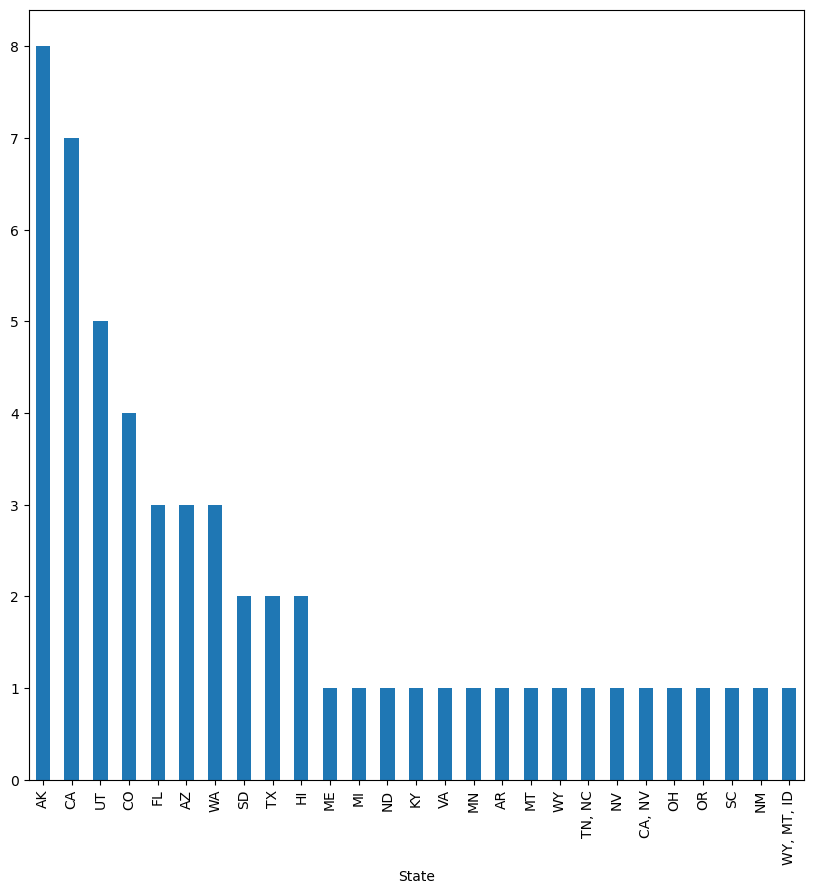

In [109]:
parks['State'].value_counts().plot(kind='bar', figsize=(10, 10))    # Number of parks in each state

In [114]:
parks[parks['State'] == 'CA']    # Parks in California

,Park Code,Park Name,State,Acres,Latitude,Longitude
10,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42
31,JOTR,Joshua Tree National Park,CA,789745,33.79,-115.90
36,LAVO,Lassen Volcanic National Park,CA,106372,40.49,-121.51
43,PINN,Pinnacles National Park,CA,26606,36.48,-121.16
44,REDW,Redwood National Park,CA,112512,41.30,-124.00
47,SEKI,Sequoia and Kings Canyon National Parks,CA,865952,36.43,-118.68
54,YOSE,Yosemite National Park,CA,761266,37.83,-119.50


In [115]:
parks[(parks['State'] == 'CA') & (parks['Acres'] > 50000)]    # Parks in California

In [119]:
mammals = species[species['Category'] == 'Mammal']    # Mammals

In [122]:
rare_mammals = mammals[mammals['Abundance'] == 'Rare']    # Rare Mammals   

In [126]:
rare_mammals.filter(items=['Common Names', 'Scientific Name'])    # Rare Mammals

,Common Names,Scientific Name
0,Moose,Alces alces
9,"Blackcat, Fisher, Pekan",Martes pennanti
35,"Cooper Lemming Mouse, Southern Bog Lemming",Synaptomys cooperi
36,Woodland Jumping Mouse,Napaeozapus insignis
1716,Red Fox,Vulpes vulpes
...,...,...
115423,Western Harvest Mouse,Reithrodontomys megalotis
115430,Black Rat,Rattus rattus
115446,Mount Lyell Shrew,Sorex lyelli
115448,Water Shrew,Sorex palustris


In [127]:
# Dataset with numbers 

titanic = pd.read_csv('train_and_test2.csv') 


In [129]:
titanic.head(2)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
